#Preprocesado de los Tweets

Importar Librerias

In [1]:
import os, re, string #librerias para el pre-procesamiento de texto
import nltk,spacy #libreria para el analisis de textos-lenguaje natural
import pandas as pd #libreria para la manipulacion y procesamiento de datos
import matplotlib.pyplot as plt #visualizaciones
import numpy as np #matlab
import gensim #modelos no supervisados para el procesadon de lenguaje natural.
import sklearn #modelos de Machine Learning
import wordcloud #visualiaciones de nube de palabra
import seaborn as sns #visializacoines

from wordcloud import WordCloud # visualizacion wordcloud
from PIL import Image #importar imagenes
from spacy import displacy #visualizar de dependencias-dendogram



Leer Archivo de Excel

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

data = pd.read_excel('trinoscerveza.xlsx')
data = pd.read_csv('trinos_cerveza.csv', sep='|')
print(data.shape)
data.head()

(200, 91)


,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,text2
0,187077341,1420117682163228672,2021-07-27 20:23:34,Seahawk_Davo,"@intensaaa2020 Mmm ya me fastidie, no me gusta...",Twitter for Android,68,1.419892e+18,1.337034e+18,intensaaa2020,...,1856,2010-09-05 05:30:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/18707734...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/8402706560...,"@intensaaa2020 Mmm ya me fastidie, no me gusta..."
1,754923173422833665,1420117600227536899,2021-07-27 20:23:15,susiurbizu,No saben lo mucho que quisiera que me gustara ...,Twitter for iPhone,70,NaN,NaN,NaN,...,4451,2016-07-18 06:18:05,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/75492317...,NaN,http://pbs.twimg.com/profile_images/1392738046...,No saben lo mucho que quisiera que me gustara ...
2,4518941727,1420117528110587905,2021-07-27 20:22:57,Veothfolnir,Escribo mal porque he bebido medio litro de ce...,TweetDeck,100,NaN,NaN,NaN,...,25370,2015-12-18 00:02:33,False,https://t.co/0pxjj8LIZr,https://www.youtube.com/channel/UCRsjWfA-Z4veF...,NaN,https://pbs.twimg.com/profile_banners/45189417...,NaN,http://pbs.twimg.com/profile_images/1340260811...,Escribo mal porque he bebido medio litro de ce...
3,1284180586257670147,1420117527384965121,2021-07-27 20:22:57,tu_tio_teviola,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j...",Twitter for Android,42,1.420092e+18,1.282937e+18,marlasuarezzz,...,18904,2020-07-17 17:38:24,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12841805...,NaN,http://pbs.twimg.com/profile_images/1417326584...,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j..."
4,1338605739221413888,1420117511786442752,2021-07-27 20:22:53,topdescuentostg,"💥Taza de Café, 18oz Vaso Termico Café Termo Do...",FRIKItwitter,260,NaN,NaN,NaN,...,0,2020-12-14 22:04:48,False,https://t.co/ks5VRb7KD1,https://t.me/TOP_Descuentos,NaN,https://pbs.twimg.com/profile_banners/13386057...,NaN,http://pbs.twimg.com/profile_images/1338609798...,"💥Taza de Café, 18oz Vaso Termico Café Termo Do..."


In [6]:
#data=pd.read_excel("/content/drive/MyDrive/Maestria en Analitica I/Procesamiento del Lenguaje Natural/Archivos/trinoscerveza.xlsx")
#data

Limpieza de los datos

In [7]:
# Crear funcion con los patrones de emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                          "]+", flags=re.UNICODE)
  

#Crear una funcion para limpiar tweets

def CleanTweets(text):
  text=re.sub(r'@_[A-Za-z0-9]+_','',text) #Remover @_menciones_
  text=re.sub(r'@[A-Za-z0-9]+_[A-Za-z0-9]+','',text) #Remover @menciones_
  text=re.sub(r'@[A-Za-z0-9]+','',text) #Remover @menciones
  text=re.sub(r'https?:\/\/\S+','',text) #Remover Hypervinculos
  text=re.sub(r'RT[\s]+','',text) #Remover Retweets
  text=re.sub(r'#[A-Za-z0-9]+','',text) #Remover "#"
  text= emoji_pattern.sub(r'',text) #Remover emojis/simbolos
  text=re.sub(r'[0-9]','',text) #remover numeros
  text=re.sub(r'[^\w\s]',"",text) #remover signos de puntuacion
  text=re.sub(r'\n|\t',' ',text) #remover saltos de linea
  text=re.sub(r'[\s]+',' ',text) #reemplazar espacios dobles por espacion sencillos
  text=re.sub(r"^[\s]",'',text) #eliminar espacios al inicio de cada tweet



  text=text.lower() #todo a minuscula
 
 
  return text

#Aplicar funcion a los trinos
data2=data[:]
data2["text2"]=data2["text2"].apply(CleanTweets)

#mostrar data
data2.head(n=5)


,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,text2
0,187077341,1420117682163228672,2021-07-27 20:23:34,Seahawk_Davo,"@intensaaa2020 Mmm ya me fastidie, no me gusta...",Twitter for Android,68,1.419892e+18,1.337034e+18,intensaaa2020,...,1856,2010-09-05 05:30:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/18707734...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/8402706560...,mmm ya me fastidie no me gusta beber casi nada...
1,754923173422833665,1420117600227536899,2021-07-27 20:23:15,susiurbizu,No saben lo mucho que quisiera que me gustara ...,Twitter for iPhone,70,NaN,NaN,NaN,...,4451,2016-07-18 06:18:05,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/75492317...,NaN,http://pbs.twimg.com/profile_images/1392738046...,no saben lo mucho que quisiera que me gustara ...
2,4518941727,1420117528110587905,2021-07-27 20:22:57,Veothfolnir,Escribo mal porque he bebido medio litro de ce...,TweetDeck,100,NaN,NaN,NaN,...,25370,2015-12-18 00:02:33,False,https://t.co/0pxjj8LIZr,https://www.youtube.com/channel/UCRsjWfA-Z4veF...,NaN,https://pbs.twimg.com/profile_banners/45189417...,NaN,http://pbs.twimg.com/profile_images/1340260811...,escribo mal porque he bebido medio litro de ce...
3,1284180586257670147,1420117527384965121,2021-07-27 20:22:57,tu_tio_teviola,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j...",Twitter for Android,42,1.420092e+18,1.282937e+18,marlasuarezzz,...,18904,2020-07-17 17:38:24,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12841805...,NaN,http://pbs.twimg.com/profile_images/1417326584...,cerveza vino whisky helado jejejeje
4,1338605739221413888,1420117511786442752,2021-07-27 20:22:53,topdescuentostg,"💥Taza de Café, 18oz Vaso Termico Café Termo Do...",FRIKItwitter,260,NaN,NaN,NaN,...,0,2020-12-14 22:04:48,False,https://t.co/ks5VRb7KD1,https://t.me/TOP_Descuentos,NaN,https://pbs.twimg.com/profile_banners/13386057...,NaN,http://pbs.twimg.com/profile_images/1338609798...,taza de café oz vaso termico café termo doble ...


Crear una lista solo con los tweets

In [8]:
tweets=list(data2["text2"])
tweets[0:50]

['mmm ya me fastidie no me gusta beber casi nada dw alcohol o cerveza',
 'no saben lo mucho que quisiera que me gustara la cerveza pero nomás no',
 'escribo mal porque he bebido medio litro de cerveza sin ingesta previa de alimento sorry not sorry',
 'cerveza vino whisky helado jejejeje ',
 'taza de café oz vaso termico café termo doble pared aislamiento al vacío acero inoxidable con tapa a prueba de fugas taza reutilizable ecológica para café té y cervezabl ',
 'me he replanteado dejar de beber cerveza solo me lo he replanteado',
 'bonico del tó y cerveza ains',
 'una cerveza para este hombre por dios',
 'si costanera es tan bueno por qué no lo tenía en el radar ahora lo que encarece una cuenta es el vino y hay que estar bien pendejo o ser un ignorante en el tema para pedir una botella si no todos piden lo mismo por el maridaje una cerveza queda mejor',
 'acabo de ver a javi abrir una cerveza con un tapón de coca cola okay',
 'una rebequita deberias llevarte si vas a salir a tomar una

Eliminar Stopwords

In [9]:
#importar stopwords de la libreria nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
misstop=stopwords.words("spanish")

#añadir stopwords identificadas
risas=['ajá','jaj','jaja','jajaja','jajajaj','jajajaja','jajajajaja','jajajajajaja','jajajajajajaja','jejejeje','jjajajaja']
otras=['pis','q','d','m','supongo','tl','gt','etc',"mmm","jaj+","jejejeje","mmendoza","morat","elzackosnydo","aur","ayuso","nbuh","tl","auronplay","rosoriooo"]  
misstop=misstop+ risas+otras

#importamos la libreria de spacy
spacy.cli.download("es")
nlp=spacy.load("es_core_news_sm")

#agregamos a la libreria de spacy la stopwords anteriormente encontradas con nltk y adicionales
for word in misstop:
  nlp.vocab[word].is_stop=True

#Convertir tweets a texto
doc_tweets=" ".join(tweets)

#tokenizar nuestros tweets con spacy
doc1=nlp(doc_tweets)

#crear lista de tokens
morfo=[]
for x in range(1,len(doc1)):
    morfo.append([doc1[x].text, doc1[x].lemma_,doc1[x].is_stop, doc1[x].is_punct, doc1[x].is_alpha])

#volver dataframe
palabras=pd.DataFrame(morfo)
#quitar stopwords
palabras=palabras[palabras[2]==False]
#quitar puntuacion
palabras=palabras[palabras[3]==False]
##quitar números
palabras=palabras[palabras[4]==True]


[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 32.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


Generar Wordcloud por palabras sin stopwords

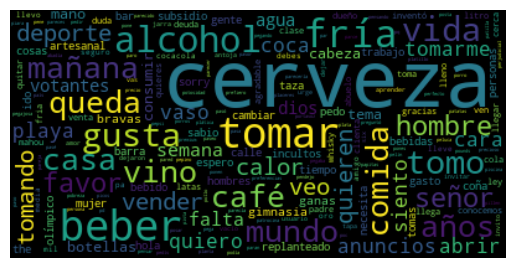

None

In [13]:
#tabla de frecuencias

dist_freq=palabras.value_counts(palabras[0]) #generar una serie de frecuencias por token
dist_freq=dist_freq.to_frame() #convertir serie a dataframe
dist_freq.columns=["freq"] #nombrar columnas
dist_freq.index.name="token_index" #renombrar indicador de columna
dist_freq["token"]=dist_freq.index


#convertir a diccionario
dictio={}
for freq,token in dist_freq.values:
  dictio[token]=freq

#generar word cloud
wc=WordCloud() #asignar funcion
wc.generate_from_frequencies(frequencies=dictio)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
figura=plt.show()
display(figura)

El topico principal es **cerveza** que la prefieren fria, con cafe, con alcohol y con comida en lugares como casa o playa  y esta asociada a beber, tomar, tomo,tomarme,abrir,consumir,vender.

La eliminacion de stopwords,signos de puntuacion y numeros arrojo buenos resultados para describir estos trinos de cerveza, por lo tanto, vamos a realizar estos filtros a nuestros tweets

In [14]:
#importar libreria de nltk para tokenizar
nltk.download("punkt")

#Generar lista de stopwords, signos de puntuacion y numeros
Stopwords=[]
for x in range(1,len(doc1)):
  if doc1[x].is_stop==True or doc1[x].is_punct==True or doc1[x].is_alpha==False:
    Stopwords.append(doc1[x].text)

#funcion para filtar Stopwords
def filtrado(texto):
    filtrados=[word for word in texto if (word not in Stopwords) and (word not in misstop)]
    return(filtrados)

#Eliminar esos stopwords de los tweets
filtradito=[]
for i in range(len(tweets)):
  aux=nltk.tokenize.word_tokenize(tweets[i],language="spanish")
  tempfilt=filtrado(aux)
  filtradito.append(tempfilt)

#unirficar nuevamente los tweets
tweets2=[]
for element in filtradito:
    tweets2.append(" ".join(element))

tweets2[0:50]



[nltk_data] Downloading package punkt to /Users/habi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['fastidie gusta beber dw alcohol cerveza',
 'quisiera gustara cerveza nomás',
 'escribo bebido litro cerveza ingesta previa alimento sorry not sorry',
 'cerveza vino whisky helado',
 'taza café oz vaso termico café termo doble pared aislamiento vacío acero inoxidable tapa prueba fugas taza reutilizable ecológica café té cervezabl',
 'replanteado dejar beber cerveza replanteado',
 'bonico tó cerveza ains',
 'cerveza hombre dios',
 'costanera radar encarece vino pendejo ignorante tema pedir botella piden maridaje cerveza queda',
 'acabo javi abrir cerveza tapón coca cola okay',
 'rebequita deberias llevarte vas salir tomar cerveza',
 'also señor clase decidí abrir cerveza alguien acabar lol',
 'guagua pa calle cerveza pa sistema cuadrá',
 'erik alzó mirada vaso cerveza contempló rostro pavor joven sucedió parecido sintió clase vértigo idea efecto mundo',
 'sentimientos encontrados rivera amo tomarme cerveza fría cae sudor cara',
 'falta foto ampliando pista litro cerveza libros suelo ím

#Analisis Semantico

## Representación de textos y palabras: One-hot encoding, TF y TF-IDF

Vamos a utilizar tres técnicas básicas para representar semánticamente textos:
- **One hot encoding** (cada palabra del vocabulario en el texto tiene 1, de resto tiene 0).
- **TF** (cada palabra del vocabulario en el texto tiene *el conteo de su frecuencia*, de resto tiene 0). 

- **TF-IDF** para encontrar las palabras más relevantes de un texto a partir de su comparación con otros textos. En particular TF-IDF relaciona la frecuencia de los términos en el texto (documento) y la frecuencia de los mismos términos en la colección de documentos. A mayor frecuencia del término/palabra (TF=Term frequency), mayor importancia; a mayor porcentaje de documentos con el término/palabra, menor importancia (por eso se llama IDF: Inverse Document Frequency)


### Representacion One-Hot Encoding

In [16]:
#Importar Libreria
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Generar Representacion
#max_df maxima frecuencia de una palabra (para evitar stopwords)
#min_df minima frecuencia de una palabra.
#max_features maximo numero de palabras a considerar
onehot_model=CountVectorizer(max_df=0.9,min_df=2,max_features=1000, binary=True)

#tokenizar 
oh_dfm=onehot_model.fit_transform(tweets2)
vocabulario=onehot_model.get_feature_names_out()
print(vocabulario[0:1000])


['abrir' 'abuelo' 'agua' 'alcohol' 'amigo' 'amor' 'antoja' 'artesanal'
 'años' 'bar' 'barra' 'beber' 'bebidas' 'bebido' 'bravas' 'cabeza' 'café'
 'calle' 'calor' 'cara' 'casa' 'cerca' 'clase' 'coca' 'cocacola' 'cola'
 'comida' 'conocemos' 'consumir' 'cosas' 'coña' 'debes' 'dejar' 'dejaron'
 'deporte' 'dios' 'duda' 'dueño' 'falta' 'favor' 'fria' 'fría' 'ganas'
 'gasto' 'gente' 'gracias' 'gusta' 'hola' 'hombre' 'hombres' 'ido'
 'inventó' 'invitar' 'invito' 'jarra' 'latas' 'ley' 'litro' 'llega'
 'llegar' 'llevo' 'mano' 'mañana' 'media' 'mujer' 'mundo' 'necesita'
 'olímpico' 'pedo' 'personas' 'playa' 'queda' 'quieren' 'quieres' 'quiero'
 'quitar' 'sabio' 'seguro' 'semana' 'señor' 'siento' 'six' 'subsidio'
 'tapa' 'tema' 'tiempo' 'toma' 'tomando' 'tomar' 'tomarme' 'tomas' 'tomo'
 'trabajo' 'urge' 'usuario' 'vacío' 'vas' 'vaso' 'ven' 'vender' 'veo'
 'vida' 'vino' 'whisky']


In [18]:
print(len(onehot_model.stop_words_))

902


con un max_df del 90% elimina la palabra mas frecuente de nuestro tweets "cerveza" ademas de ser el topico principal de estos. Con un min_df de 2 solo consideraremos aquellos tokens que tengan presencia en al menos en 2 tweets

In [19]:
denso_oh=oh_dfm.todense() #crear matriz de frecuencias
listadensa_oh=denso_oh.tolist() #convertir a lista
dfm_oh_base=pd.DataFrame(listadensa_oh,columns=vocabulario) #crear columnas , nombre columna=vocabulario
#dfm_oh=dfm_oh_base.transpose() #transponer
display(dfm_oh_base)


,abrir,abuelo,agua,alcohol,amigo,amor,antoja,artesanal,años,bar,...,usuario,vacío,vas,vaso,ven,vender,veo,vida,vino,whisky
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Esta matriz muestra que tenemos 200 tweets con 104 palabras que no son stopwords y que aparecen al menos en 2 tweets. 1 indica que esta la palabra en el tweet ,0 lo contrario.

### Representacion TF

In [21]:
#Importar Libreria
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Generar Representacion
#max_df maxima frecuencia de una palabra (para evitar stopwords)
#min_df minima frecuencia de una palabra.
#max_features maximo numero de palabras a considerar
#eliminamos el parametro binario=False
tf_model=CountVectorizer(max_df=0.9,min_df=2,max_features=2000, binary=False)

#tokenizar 
oh_dfm2=tf_model.fit_transform(tweets2)
vocabulario2=tf_model.get_feature_names_out()

#Graficar

denso_oh2=oh_dfm2.todense() #crear matriz de frecuencias
listadensa_oh2=denso_oh2.tolist() #convertir a lista
dfm_oh_base2=pd.DataFrame(listadensa_oh2,columns=vocabulario) #crear columnas , nombre columna=vocabulario
#dfm_oh2=dfm_oh_base2.transpose() #transponer
display(dfm_oh_base2)


,abrir,abuelo,agua,alcohol,amigo,amor,antoja,artesanal,años,bar,...,usuario,vacío,vas,vaso,ven,vender,veo,vida,vino,whisky
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Esta matriz muestra que tenemos 200 tweets con 104 palabras que no son stopwords y que aparecen al menos en 2 tweets. la metrica es la frecuencia de la palabra en el tweet. Por ejemplo, la palabra cafe aparece 4 veces en el tweet 4.

In [22]:
display(dfm_oh_base2["café"])

0      0
1      0
2      0
3      0
4      3
      ..
195    0
196    0
197    0
198    0
199    0
Name: café, Length: 200, dtype: int64

### Representacion TF-IDF

In [23]:
#Importar Libreria
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Generar Representacion
#max_df maxima frecuencia de una palabra (para evitar stopwords)
#min_df minima frecuencia de una palabra.
#max_features maximo numero de palabras a considerar
libros_tfidf=TfidfVectorizer(max_df=0.9,min_df=2,max_features=2000)

#tokenizar 
tfidf_dfm=libros_tfidf.fit_transform(tweets2)
vocabulariotfidf=libros_tfidf.get_feature_names_out()

#Graficar
denso_tfidf=tfidf_dfm.todense()
listadensa_tfidf=denso_tfidf.tolist()
dfm_tfidf_base=pd.DataFrame(listadensa_tfidf,columns=vocabulariotfidf)
#dfm_tfidf=dfm_tfidf_base.transpose()
display(dfm_tfidf_base)

,abrir,abuelo,agua,alcohol,amigo,amor,antoja,artesanal,años,bar,...,usuario,vacío,vas,vaso,ven,vender,veo,vida,vino,whisky
0,0.0,0.0,0.0,0.585294,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.654998,0.755631
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.302543,0.0,0.285821,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
196,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
197,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.602871,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
198,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


Aplica una normalizacion a los datos, a traves de la siguiente formula:
IDF=log (Frecuencia de la palabra en todos los Tweets/(1+ Frecuencia de la palabra en el tweet i))

Los que tiene un IDF alto son palabras diferenciales de un tweet mientras que los que presentan un IDF bajo generalmente corresponden a stopwords

## Distancia entre vectores (términos,documentos) y sus aplicaciones: La similitud coseno
**Clustering de Tweets**

Se busca comparar los tweets y encontrar similitudes entre ellos atraves del calculo de distancia **Similitud de Coseno**, siendo esta muy util en matrices de muchos ceros(como en nuestro caso).

La representacion que se va emplear es **TF-IDF** data su normalizacion de los datos.

**Matriz TF-IDF Tweets**

In [24]:
display(dfm_tfidf_base) 

,abrir,abuelo,agua,alcohol,amigo,amor,antoja,artesanal,años,bar,...,usuario,vacío,vas,vaso,ven,vender,veo,vida,vino,whisky
0,0.0,0.0,0.0,0.585294,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.654998,0.755631
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.302543,0.0,0.285821,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
196,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
197,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.602871,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
198,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


**Dimension de la matriz**

200 tweets x 104 tokens

In [25]:
dfm_tfidf_base.shape


(200, 104)

**Vocabulario o Tokens**

In [26]:
print(vocabulariotfidf)

['abrir' 'abuelo' 'agua' 'alcohol' 'amigo' 'amor' 'antoja' 'artesanal'
 'años' 'bar' 'barra' 'beber' 'bebidas' 'bebido' 'bravas' 'cabeza' 'café'
 'calle' 'calor' 'cara' 'casa' 'cerca' 'clase' 'coca' 'cocacola' 'cola'
 'comida' 'conocemos' 'consumir' 'cosas' 'coña' 'debes' 'dejar' 'dejaron'
 'deporte' 'dios' 'duda' 'dueño' 'falta' 'favor' 'fria' 'fría' 'ganas'
 'gasto' 'gente' 'gracias' 'gusta' 'hola' 'hombre' 'hombres' 'ido'
 'inventó' 'invitar' 'invito' 'jarra' 'latas' 'ley' 'litro' 'llega'
 'llegar' 'llevo' 'mano' 'mañana' 'media' 'mujer' 'mundo' 'necesita'
 'olímpico' 'pedo' 'personas' 'playa' 'queda' 'quieren' 'quieres' 'quiero'
 'quitar' 'sabio' 'seguro' 'semana' 'señor' 'siento' 'six' 'subsidio'
 'tapa' 'tema' 'tiempo' 'toma' 'tomando' 'tomar' 'tomarme' 'tomas' 'tomo'
 'trabajo' 'urge' 'usuario' 'vacío' 'vas' 'vaso' 'ven' 'vender' 'veo'
 'vida' 'vino' 'whisky']


**Calculo de Similitud del Coseno**

In [27]:
#Importar Libreria
from sklearn.metrics.pairwise import cosine_similarity

#calcular distancia
#indicar el numero de tweet a tomar, en este caso vamos a tomar los 200
similitudes=cosine_similarity(dfm_tfidf_base[0:200],dfm_tfidf_base[0:200])
similitudes[0:5,0:5]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

**Normalizar la distancia del Coseno**

para aplicar K-means debemos normalizar la distancia coseno

In [28]:
import numpy as np
finalsinceros=dfm_tfidf_base.loc[dfm_tfidf_base.sum(axis=1)!=0,] #Eliminar aquellos que no tengan ninguna de los tokens foco
length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None] #suma de IDF al cuadrado por tweet
finalm2 = finalsinceros / length #normalizacion
##corregir si lenght=0

/var/folders/p1/3s8c0dxx21bfvlztxjr_3h840000gp/T/ipykernel_2422/3134724364.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None] #suma de IDF al cuadrado por tweet


In [29]:
finalsinceros.shape

(136, 104)

Se eliminaron 67 tweets que no contenian ninguno de los tokens aplicados.

**Numero de Cluster-Diagrama de Codo-K Medias Clustering**

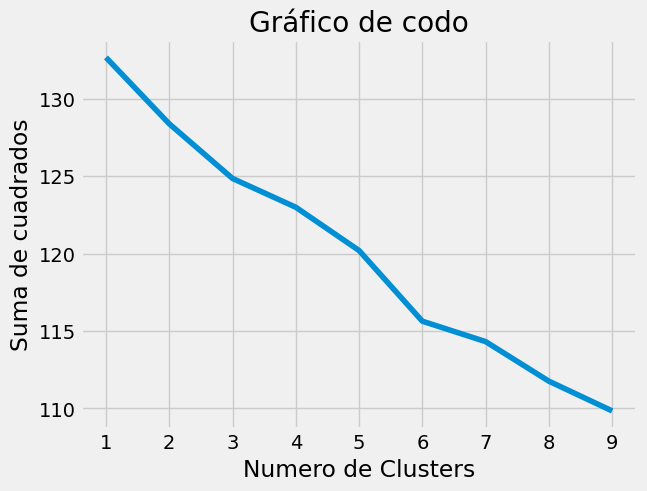

In [39]:
#importar libreria K-medias
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

#Utilizar 10 cluster de referencia
cluster=10
sse=[]
for k in range(1, cluster):
  kmeans = KMeans(n_clusters=k, random_state=5555)
  kmeans.fit(finalm2)
  sse.append(kmeans.inertia_)

#Grafico de Codo
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, cluster), sse)
plt.xticks(range(1, cluster))
plt.xlabel("Numero de Clusters")
plt.ylabel("Suma de cuadrados")
plt.title('Gráfico de codo')
plt.show()

No parece tan claro los cluster a utlizar.Tomaremos 6 clusters.

In [40]:
#Kmedias
kmeans = KMeans(n_clusters=6,n_init=1000,max_iter=1000,random_state=5555).fit(finalm2)
centroids = kmeans.cluster_centers_
display(centroids)

array([[-3.46944695e-18,  0.00000000e+00,  6.09874374e-02,
         1.54803652e-01, -3.46944695e-18, -1.73472348e-18,
        -1.73472348e-18, -1.73472348e-18,  6.48241596e-02,
         4.27696980e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.46944695e-18,  1.73472348e-18,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.93889390e-18,  3.46944695e-18, -3.46944695e-18,
         1.73472348e-18, -3.46944695e-18, -3.46944695e-18,
         3.46944695e-18, -1.73472348e-18, -6.93889390e-18,
        -3.46944695e-18,  1.73472348e-18,  0.00000000e+00,
        -1.73472348e-18,  4.77897218e-02,  0.00000000e+00,
         3.20139498e-02, -1.73472348e-18, -3.46944695e-18,
        -3.46944695e-18, -3.46944695e-18,  0.00000000e+00,
        -3.46944695e-18,  1.73472348e-18,  0.00000000e+00,
        -3.46944695e-18, -1.73472348e-18,  0.00000000e+00,
         3.46944695e-18,  1.04083409e-17,  4.77897218e-02,
         0.00000000e+00, -3.46944695e-18,  8.67361738e-1

Tomaremos las 7 palabras mas representativas por cluster

In [41]:
#extraer #palabras mas representativos
destacados=np.argsort(centroids,axis=1)[:,-7:]

#guardo como listas los indices y las palabras
llevarlos=destacados.tolist()
paltotal=vocabulariotfidf.tolist()
#detecto que palabras corresponden a cada cluster
palabras_total=[]
for i in range(len(llevarlos)):
  palabras_linea=[]
  for k in range(len(llevarlos[i])):
    palabras_linea.append(paltotal[llevarlos[i][k]])
  palabras_total.append(palabras_linea)

palabras_total

[['llevo', 'agua', 'vas', 'años', 'alcohol', 'mañana', 'tomar'],
 ['tiempo', 'coña', 'fria', 'vino', 'tema', 'tomo', 'gusta'],
 ['vender', 'comida', 'hombre', 'café', 'casa', 'señor', 'fría'],
 ['gusta', 'dios', 'años', 'dejar', 'duda', 'alcohol', 'beber'],
 ['cara', 'tomar', 'fría', 'llega', 'alcohol', 'abrir', 'vida'],
 ['falta', 'whisky', 'vaso', 'tomando', 'clase', 'tiempo', 'mundo']]

 De esta agrupacion de tweets de cerveza puede deducirse que los trending son:






1. Vender en casa o bebidas como cafe frias al hombre.
2. Gusto por las bebidas: alcohol,agua,vino.
3. Falta tiempo para beber.
4. Significado de beber cerveza o alcohol como "vida".
5. Llevar agua por si tomas mañana.
6. Cuestionar el dejar la bebida.



**Asignacion de los cluster a los tweets**

In [ ]:
labels = pd.DataFrame(kmeans.predict(finalm2))
totalcl=pd.concat([data["text"],labels],axis=1)
totalcl.columns=["tweet","cluster"]

totalcl.head(n=10)

,tweet,cluster
0,"@intensaaa2020 Mmm ya me fastidie, no me gusta...",3.0
1,No saben lo mucho que quisiera que me gustara ...,2.0
2,Escribo mal porque he bebido medio litro de ce...,2.0
3,"@marlasuarezzz Cerveza, Vino, Whisky, Helado j...",2.0
4,"💥Taza de Café, 18oz Vaso Termico Café Termo Do...",3.0
5,Me he replanteado dejar de beber cerveza.\n\nS...,2.0
6,@_JNox_ Bonico del tó. \nY cerveza.\nAins.,1.0
7,@abogadolpa Una cerveza para este hombre por d...,2.0
8,Si Costanera 700 es tan bueno por qué no lo te...,0.0
9,acabo de ver a Javi abrir una cerveza con un t...,2.0


Vamos a ver por ejemplo los cuestionamiento por dejar la cerveza.

In [48]:
totalcl[totalcl["cluster"]==3]

,tweet,cluster
0,"@intensaaa2020 Mmm ya me fastidie, no me gusta...",3.0
4,"💥Taza de Café, 18oz Vaso Termico Café Termo Do...",3.0
15,"¿Qué falta en la foto? Ampliando, en la segund...",3.0
26,"Señor @GarciaAdanero , usted tiene un par de c...",3.0
31,@Kappah20 si tu pis sabe a cerveza abreme al d...,3.0
53,ⓘ Este usuario necesita una cerveza \n\nUna @c...,3.0
55,@CallejoHernanz Verás cuando veamos la tierra ...,3.0
108,@littlepipedream Me gusta el ginebra con tónic...,3.0
127,Estoy en la terminal merendando licuado de ban...,3.0
134,@hatedontlie Ven a mi casa a echarte una cerve...,3.0


Algunos tweets parecer esta muy encaminados a ese tema por ejemplo el tweet 0, 108. Sin embargo, no es del todo preciso, esto se debe a que  al revisar el numero de cluster por el diagrama de codo no se refleja una convergencia hacia un numero especifico de clusters.


## Representacion de los Elementos del Vocabulario
**Clustering por palabras**

##Matriz de Co-ocurrencias

Para este caso tomaremos los tweets con stopwords ya que son relevantes para el calculo de PMI. Eliminar signos de puntuacion y expresiones de risa puede ser conveniente ya que no deberian tokenizarse como vocabulario.

In [49]:
#eliminar dobles espacio
tweets_text=' '.join(tweets2) #convertir a texto
tweets_text2=re.sub(r'[\s]+',' ',tweets_text)
tweets_text2[0:1000]

#tokenizar con nltk
nltk.download("punkt")
nltk.download("stopwords")
fichas_tweets=nltk.tokenize.word_tokenize(tweets_text2,language="spanish")
tweets_tokenizados=nltk.Text(fichas_tweets)
print(tweets_tokenizados)

<Text: fastidie gusta beber dw alcohol cerveza quisiera gustara...>


[nltk_data] Downloading package punkt to /Users/habi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Posteriormente se van a crear bigramas de dos tokens consecutivos y calcularemos su PMI asociado.

In [94]:
from nltk.collocations import *
from nltk import bigrams

#importar bigramas y trigramas de nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

finder = BigramCollocationFinder.from_words(tweets_tokenizados)

#obtenerlos con su PMI
scored=finder.score_ngrams(bigram_measures.pmi)
scored[0:5]
#ordenarlos por PMI
listabig=sorted(bigram for bigram, score in scored)
#listabig[0:100]
len(listabig)

1364

se crearon 1364 bigramas

In [95]:
##extraerlos para hacer la representación
inicio=[]
fin=[]
puntaje=[]
for i in range(0,len(scored)):
          inicio.append(scored[i][0][0])
          fin.append(scored[i][0][1])
          puntaje.append(scored[i][1])

#Generar dataframe          
init_pmi = pd.DataFrame(
    {'palabra1': inicio,
     'palabra2': fin,
     'puntaje': puntaje
    })
init_pmi

,palabra1,palabra2,puntaje
0,abierta,coño,10.482808
1,abreme,dm,10.482808
2,abril,año,10.482808
3,acaba,cerrar,10.482808
4,acabaita,vacunar,10.482808
...,...,...,...
1359,cerveza,vida,0.239634
1360,vida,cerveza,0.239634
1361,cerveza,alcohol,0.017242
1362,cerveza,tomar,-0.497332


Convertirlo a una matriz de co-ocurrencias

In [96]:
coocur=init_pmi.pivot(index="palabra1",columns="palabra2") #pivot en filas y columnas
coocur=coocur['puntaje'].reset_index() #medida-puntaje
coocurt=coocur.fillna(0) #reemplazar nulos por ceros

coocurt

palabra2,palabra1,abadía,abajo,abierta,abreme,abril,abrir,abrió,abría,abuelo,...,ycon,yooooooo,zona,ía,ímica,ñarural,ón,única,único,únicos
0,abadía,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abierta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abreme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abril,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,ñarural,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,ón,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,única,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,único,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Encontrar similitudes de palabras**

Con la matriz de co-ocurrencias podemos calcular la similitud entre palabras, tomaremos por ejemplo, vamos a encontrar la palabra que semanticamente se parezaca mas a cerveza.

In [97]:
word_location=coocurt.columns.get_loc("cerveza") #ubicacion en la matriz de la palabra cerveza
word_location

197

In [98]:
import numpy as np

a1=coocurt.iloc[:,1:].transpose()
b1=coocurt["dios"].to_frame().transpose() #vector con la palabra de interes-cerveza

#excluir del calculo la misma palabra
a1=a1[~a1.index.isin(["dios"])]

#calculo de la distancia de similitud del coseno del vector de interes
distancia=cosine_similarity(a1,b1)


#encontrar la palabra que mas se parezca semanticamente
coocurt.columns[np.argmax(distancia)+1]


'sabiduría'

la palabra con mayor similitud semantica a dios (palabra policemica) es a sabiduria

##Word embeddings

La similitud en terminos semanticos es posible mejorarla atraves de una red neuronal. 

Podemos entrenar una red neuronal para predecir una palabra a partir de las palabras que la rodean.Wn este caso con una sola capa intermedia. Los pesos de la capa final serán la representación vectorial del elemento del vocabulario (palabra). Vamos a usar gensim, y dentro de él, la estrategia Word2vec

In [99]:
#importar modelo word2vec
from gensim.models import Word2Vec

#importar stopwords de nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
misstop2=stopwords.words("spanish")

#tokenizar cada tweet
lista_tokenizada=[]
for tw in tweets2:
  temp=re.sub(r'[^\w\s]',"",tw) #eliminar signos de puntuaciones
  risas=['ajá','jaj','jaja','jajaja','jajajaj','jajajaja','jajajajaja','jajajajajaja','jajajajajajaja','jejejeje','jjajajaja']
  temp2=re.sub(r'|'.join(risas),'',temp) #eliminar risas
  temp3=re.sub (" +"," ",temp2) #eliminar doble espacios
  temp4=nltk.tokenize.word_tokenize(temp3,language="spanish")
  temp5=[word for word in temp4 if word not in misstop2]
  lista_tokenizada.append(temp5)

print(lista_tokenizada[0:5])

[['fastidie', 'gusta', 'beber', 'dw', 'alcohol', 'cerveza'], ['quisiera', 'gustara', 'cerveza', 'nomás'], ['escribo', 'bebido', 'litro', 'cerveza', 'ingesta', 'previa', 'alimento', 'sorry', 'not', 'sorry'], ['cerveza', 'vino', 'whisky', 'helado'], ['taza', 'café', 'oz', 'vaso', 'termico', 'café', 'termo', 'doble', 'pared', 'aislamiento', 'vacío', 'acero', 'inoxidable', 'tapa', 'prueba', 'fugas', 'taza', 'reutilizable', 'ecológica', 'café', 'té', 'cervezabl']]


[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [178]:
#tamaño del vector size 10000
#window analiza 5 palabras que la rodean, tomando desde una capa intermedia
#otros parametros min_count
model_tweets=Word2Vec(lista_tokenizada,vector_size = 10000, window = 6, seed= 8888)



#ver el vector de una palabra
#model_tweets["cerveza"]
model_tweets.wv['cerveza']
#9999
#array([-2.5131398e-05,  3.3465432e-05,  4.6230274e-05, ...,
#        2.6696049e-05, -9.9135295e-06, -1.3865269e-05], dtype=float32)

array([-9.0541434e-05, -4.9350998e-05,  3.0874417e-05, ...,
        9.9061719e-05, -7.7125333e-05, -4.7349069e-05], dtype=float32)

**Encontrar similitudes por palabra**

Encontrar el top 10 de palabras mas similares a cerveza

In [179]:
#similitud=model_tweets.similar_by_word("cerveza", topn=10)
similitud=model_tweets.wv.similar_by_word("cerveza", topn=10)
similitud

[('queda', 0.012265953235328197),
 ('fría', 0.011019174009561539),
 ('beber', 0.00838016252964735),
 ('mañana', 0.007824812084436417),
 ('tomar', 0.007523630745708942),
 ('casa', 0.0023849885910749435),
 ('años', 0.0018849287880584598),
 ('vida', 0.001052841660566628),
 ('vino', 0.0008501168922521174),
 ('café', 0.0005827879649586976)]

vemos que la palabra cerveza es asociada con:
- tomar/tomo/beber : acciones para ingerir bebida.
- alcohol/vino/café: otro tipo de bebida que puede ser complemento.
- fria: temperatura de preferencia de la bebida.
- comida: pueder ser complemento a las bebidas.
- mañana/años: unidad de tiempo.



In [172]:
#similitud3=model_tweets.similar_by_word("alcohol", topn=10)
similitud3=model_tweets.wv.similar_by_word("alcohol", topn=10)
similitud3

[('vino', 0.020487718284130096),
 ('fría', 0.0066297645680606365),
 ('tomar', 0.0060135372914373875),
 ('gusta', 0.005993514787405729),
 ('casa', 0.004786510951817036),
 ('años', 0.004485136829316616),
 ('queda', 0.0006627704715356231),
 ('tomo', -0.0002210841776104644),
 ('café', -0.002345547080039978),
 ('mañana', -0.004001625347882509)]

y para alcohol hay similitudes con cerveza,comida,vino café. Claramente se ve una asoacion fuerte de bebidas.

In [75]:
#similitud4=model_tweets.similar_by_word("vino", topn=10)
similitud4=model_tweets.wv.similar_by_word("vino", topn=10)
similitud4

[('cerveza', 0.012993039563298225),
 ('tomar', 0.010022895410656929),
 ('beber', 0.009143494069576263),
 ('mañana', 0.00732403714209795),
 ('vida', 0.0049490779638290405),
 ('tomo', 0.0037439356092363596),
 ('fría', -0.001500725862570107),
 ('años', -0.0016843240009620786),
 ('mundo', -0.0018104270566254854),
 ('gusta', -0.004229819402098656)]

al revisar vino vemos que hay una fuerte relacion con cerveza y comida.

**Similitud por relacion-Analogias**

In [76]:
##similitudes en relación
#analogia1=model_tweets.most_similar(positive=["cerveza", "vino"],negative=["alcohol"], topn=10, restrict_vocab=300000)
analogia1=model_tweets.wv.most_similar(positive=["cerveza", "vino"],negative=["alcohol"], topn=10, restrict_vocab=300000)
analogia1

[('tomo', 0.018296679481863976),
 ('vida', 0.0141275180503726),
 ('tomar', 0.011556588113307953),
 ('comida', -0.0011302721686661243),
 ('beber', -0.0012817791430279613),
 ('mañana', -0.001492691459134221),
 ('café', -0.0045378077775239944),
 ('mundo', -0.005031654145568609),
 ('fría', -0.010016980580985546),
 ('gusta', -0.010111134499311447)]

la cerveza es al alcohol como el vino es al cafe y a la comida.

In [79]:
##similitudes en relación
#analogia2=model_tweets.most_similar(positive=["mañana"],negative=["cerveza"], topn=10, restrict_vocab=300000)
analogia2=model_tweets.wv.most_similar(positive=["mañana"],negative=["cerveza"], topn=10, restrict_vocab=300000)
analogia2

[('beber', 0.0196091141551733),
 ('casa', 0.013365698978304863),
 ('alcohol', 0.011482329107820988),
 ('mundo', 0.0029600507114082575),
 ('fría', 0.0026656656991690397),
 ('gusta', 0.0026307443622499704),
 ('años', -0.00012584368232637644),
 ('café', -0.002724679419770837),
 ('vino', -0.004020973574370146),
 ('queda', -0.004095642827451229)]

si mañana no se bebe cerveza se bebe alcohol/vino/café, es decir, hay plan fijo.

**Grafico de Similitudes por Palabra-T-SNE**

Otra aplicación es visualizar grupos de palabras por similitudes. Con T-SNE hago una reducción de dimensiones basada en teoría de la información y puedo obtener una representación bidimensional de palabras para ser comparadas.

In [90]:
#importar libreria
from sklearn import manifold

#importar la clase TSNE
tsne=sklearn.manifold.TSNE(perplexity=3, random_state= 5555)

#tomar las 30 palabras mas similares semanticamente a cerveza y cuya similitud sea positiva
#similitud_cerveza=model_tweets.similar_by_word("cerveza", topn=30)
similitud_cerveza=model_tweets.wv.similar_by_word("cerveza", topn=30)

cerveza_similares=[]

for i in range(len(similitud_cerveza)):
  if similitud_cerveza[i][1]>0:
    temp=similitud_cerveza[i][0]
    cerveza_similares.append(temp)

#vectores de las palabras similares a cerveza
#vectors=model_tweets[cerveza_similares]
vectors=model_tweets.wv[cerveza_similares]

#reducir dimensionalidad por componentes con tsne.
reduccion=tsne.fit_transform(vectors)

/Users/habi/opt/anaconda3/envs/jave/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/habi/opt/anaconda3/envs/jave/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Ver composicion de cada componente.

In [91]:
base=pd.DataFrame()
base["primer_componente"]=reduccion[:,0]
base["segundo_componente"]=reduccion[:,1]
base["nombres"]=cerveza_similares
display(base)

,primer_componente,segundo_componente,nombres
0,-81.125404,-50.947762,tomar
1,208.398132,-15.888035,tomo
2,-55.849743,60.930927,vida
3,79.056374,82.522789,vino
4,41.854130,246.104584,mañana
5,-428.719879,97.569603,comida
6,-327.359283,148.255920,café


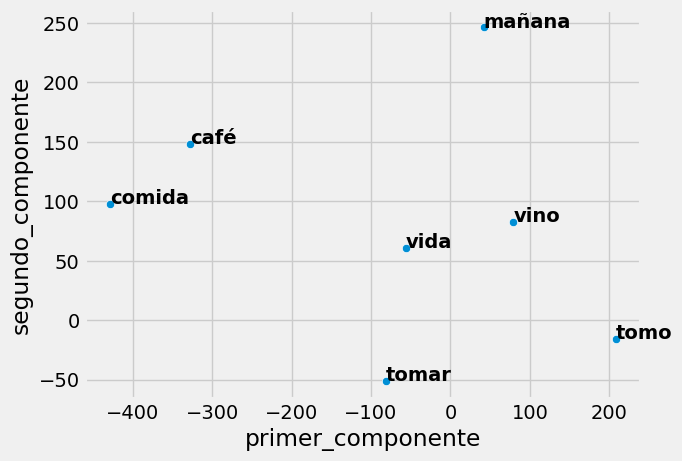

In [92]:
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

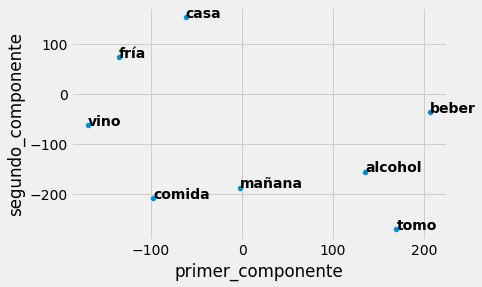

In [ ]:
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

Del grafico se puede deducir los siguientes cluster:
- Cluster 1: vino-fria-casa.
- Cluster 2: comida-mañana.
- Cluster 3: alcohol-beber-tomo.

De lo anterior se puede inferir que:
- Hay asociacion de bebidas a un lugar (casa).
- Un evento (comida) en el tiempo (mañana).
- accion(beber/tomo) de una bebida (alcohol).

**Grafico de similitudes por palabra - base de datos "SBW-vectors-300-min5.bin.gz"**

Apartir del corpus "SBW-vectors-300-min5.bin.gz" se pretende hacer una clusterizacion de la palabras claves que aparecieron en cada uno de los cluster

In [ ]:
#importar base de datos SBW-vectors-300-min5.bin.gz

from gensim.models import KeyedVectors
os.chdir("/content/drive/MyDrive/Maestria en Analitica I/Procesamiento del Lenguaje Natural/Archivos")
modelo = KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.bin.gz', binary=True)

#Modelar y aplicar componetes
from sklearn import manifold
tsne=sklearn.manifold.TSNE(perplexity=3)
palabras=['vender', 'comida', 'hombre', 'café', 'casa', 'señor', 'fría', 'gusta',
          'agua', 'alcohol', 'tema', 'tomo', 'vino', 'queda', 'falta', 'whisky', 'vaso', 'tomando',
          'clase', 'tiempo', 'mundo', 'cara', 'tomar', 'llega', 'abrir', 'vida', 'llevo', 'vas', 
          'años', 'mañana', 'dios', 'dejar', 'duda', 'beber']

vectors=modelo[palabras]
reduccion=tsne.fit_transform(vectors)


#Graficar Cluster
base=pd.DataFrame()
base["primer_componente"]=reduccion[:,0]
base["segundo_componente"]=reduccion[:,1]
base["nombres"]=palabras
display(base)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,primer_componente,segundo_componente,nombres
0,57.680920,43.048954,vender
1,96.372887,-472.038086,comida
2,-278.845215,101.228493,hombre
3,260.257355,-29.972309,café
4,-188.270538,122.244118,casa
5,-346.603821,127.132195,señor
6,-105.620461,-206.846741,fría
7,146.048508,300.720215,gusta
8,46.213696,-376.786072,agua
9,184.767792,-506.088318,alcohol


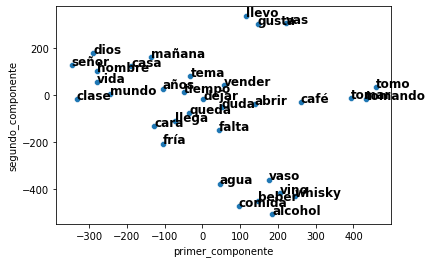

In [ ]:
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='large', color='black', weight='semibold')

Se distinguen los siguientes cluster:
- Cluster 1: agua,vaso,beber,comida,vino,alcohol,comida,whisky. Un grupo relacionado con bebidas y comida que encontrarias junto a la cerveza.
- Cluster 2: tomo,tomar, tomando. Un cluster de las conjugaciones del verbo tomar.
- Cluster 3: llevo,gusta,vas. No se refleja alguna relacion semantica entre estas.
- Cluster 4: Una nube de palabras que contienen las demas palabras claves de cada uno de los cluster.

## Ontologias

Otra manera fundamentalmente diferente de representar el lenguaje (y el conocimiento) son las ontologías. Ellas estbalecen no solo relaciones, sino tipos de relaciones entre palabras.
Vamos a explorar una de las ontologías más conocidas: Wordnet

In [ ]:
i#importar libreria
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.corpus import wordnet 

#encontrar los sinonimos de cerveza
wordnet.synsets("cerveza",lang="spa")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[Synset('beer.n.01')]

La cerveza es un concepto de un unico significado en este caso solo trajo "beer" que es justamente cerveza en ingles.

**Relaciones de los synsets: Definiciones**

Definiremos cerveza

In [ ]:
word=wordnet.synsets("cerveza",lang="spa")
for i in range(len(word)):
  print(word[i].definition())

a general name for alcoholic beverages made by fermenting a cereal (or mixture of cereals) flavored with hops


Ahora con alcohol

In [ ]:
word=wordnet.synsets("alcohol",lang="spa")
for i in range(len(word)):
  print(word[i].definition())

a liquor or brew containing alcohol as the active agent
any of a series of volatile hydroxyl compounds that are made from hydrocarbons by distillation


**Antonimos**

Busquemos los antonimos de la palabra "tomar" asociada a cerveza.

In [ ]:
word=wordnet.synsets("tomar",lang="spa")
for i in range(len(word)):
  lemma=word[i].lemmas() #obtener lista de lemma que describen la palabra
  for j in range(len(lemma)):
    antonimo=word[i].lemmas()[j].antonyms()
    if len(antonimo)>0:
      print(antonimo)

[Lemma('abstain.v.02.abstain')]
[Lemma('give.v.03.give')]


los antonimos encontrados fueron abstenerse y dar.

In [ ]:
word=wordnet.synsets("gustar",lang="spa")
for i in range(len(word)):
  lemma=word[i].lemmas() #obtener lista de lemma que describen la palabra
  for j in range(len(lemma)):
    antonimo=word[i].lemmas()[j].antonyms()
    if len(antonimo)>0:
      print(antonimo)

[Lemma('dislike.v.01.dislike')]


y para gustar, no gustar.

**Taxonomías: Hiperonimia e hiponimia**

El conocimiento está también clasificado en taxonomías, teniendo hiperónimos (categoría superior) e hipónimos (categoría inferior). Estas estructuras forman árboles taxonómicos de los cuales se pueden derivar diferentes relaciones y métricas.

In [ ]:
#hypernimos y  de las palabras: cerveza
palabras=["cerveza"]

print( "hypernimos")
for i in range(len(palabras)):
  word=wordnet.synsets(palabras[i],lang="spa")
  for j in range(len(word)):
    hypernimo=word[j].hypernyms()
    for k in range(len(hypernimo)):
      print(hypernimo[k])

print("hiponimos")
for i in range(len(palabras)):
  word=wordnet.synsets(palabras[i],lang="spa")
  for j in range(len(word)):
    hiponimo=word[j].hyponyms()
    for k in range(len(hiponimo)):
      print(hiponimo[k])

hypernimos
Synset('brew.n.01')
hiponimos
Synset('ale.n.01')
Synset('draft_beer.n.01')
Synset('lager.n.02')
Synset('suds.n.02')


Para cerveza su hiperonimo es fermentar. Y sus hiponimos son los tipos de cerveza: ale, lager, cerveza de barril, cerveza artesanal

In [ ]:
#hypernimos y  de las palabras: alcohol
palabras=["alcohol"]

print( "hypernimos")
for i in range(len(palabras)):
  word=wordnet.synsets(palabras[i],lang="spa")
  for j in range(len(word)):
    hypernimo=word[j].hypernyms()
    for k in range(len(hypernimo)):
      print(hypernimo[k])

print("hiponimos")
for i in range(len(palabras)):
  word=wordnet.synsets(palabras[i],lang="spa")
  for j in range(len(word)):
    hiponimo=word[j].hyponyms()
    for k in range(len(hiponimo)):
      print(hiponimo[k])

hypernimos
Synset('beverage.n.01')
Synset('drug_of_abuse.n.01')
Synset('liquid.n.01')
hiponimos
Synset('aperitif.n.01')
Synset('brew.n.01')
Synset('hard_cider.n.01')
Synset('home_brew.n.01')
Synset('hooch.n.01')
Synset('kava.n.01')
Synset('koumiss.n.01')
Synset('liqueur.n.01')
Synset('liquor.n.01')
Synset('mixed_drink.n.01')
Synset('neutral_spirits.n.01')
Synset('nipa.n.02')
Synset('perry.n.04')
Synset('proof_spirit.n.01')
Synset('pulque.n.01')
Synset('rotgut.n.01')
Synset('sake.n.02')
Synset('slug.n.05')
Synset('wine.n.01')
Synset('allyl_alcohol.n.01')
Synset('amyl_alcohol.n.01')
Synset('butyl_alcohol.n.01')
Synset('cyclohexanol.n.01')
Synset('diol.n.01')
Synset('ethyl_alcohol.n.01')
Synset('glycerol.n.01')
Synset('isopropyl_alcohol.n.01')
Synset('lauryl_alcohol.n.01')
Synset('methanol.n.01')
Synset('propanol.n.01')
Synset('sterol.n.01')


para alcohol sus hiperonimos son: bebida, abuso de drogas (relacionado con el problema del alcoholismo) y liquido. sus hiponimos notese que son bastantes, llama la atencion que fertilizar sea un hiponimo de alcohol. Por lo tanto, se puede decir que una relacion de jerarquia entre cerveza y alcohol, siendo alcohol un hipernimo de cerveza.

**Parte y Todo**

Las relaciones de parte y todo son llamadas *meronimia* (el merónimo es la parte) y *holonimia* (el holónimo es el todo). Hay relaciones de parte, de miembro y de sustancia.

In [ ]:
word=wordnet.synsets("café",lang="spa")
print("meronimo")
for i in range(len(word)):
    print(word[i].part_meronyms())

print("holonimo")
for i in range(len(word)):
  print(word[i].part_holonyms())


meronimo
[]
[]
[]
[]
[Synset('coffee_bean.n.01')]
holonimo
[]
[]
[Synset('coffee.n.02')]
[]
[]


el meronimo de cafe es la pepa de café y su holonimo es café. Al revisar la definicion del holonimo 2, resulta que es un snack de café.

In [ ]:
word=wordnet.synsets('café', lang='spa')
print(word[1].definition())

a snack taken during a break in the work day
